In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
np.random.seed(1)
%matplotlib inline

In [2]:
def generate_data(n_total, n_positive):
    x = np.random.normal(size=(n_total, 2))
    x[:n_positive, 0] -= 2
    x[n_positive:, 0] += 2
    x[:, 1] *= 2.
    x = np.concatenate([x, np.ones(x.shape[0]).reshape(-1,1)], axis=1)
    y = np.empty(n_total, dtype=np.int64)
    y[:n_positive] = 1
    y[n_positive:] = -1
    return x, y

In [12]:
def calc_A(a, b):
    diff = train_x[train_y == a][None] - train_x[train_y == b][:, None]
    norm = np.zeros((diff.shape[0], diff.shape[1]))
    for i in range(diff.shape[0]):
        norm[i] = np.linalg.norm(diff[i], ord=2, axis=1)
    return np.mean(norm.flatten())

def calc_b(a):
    diff = eval_x[None] - train_x[train_y == a][:, None]
    norm = np.zeros((diff.shape[0], diff.shape[1]))
    for i in range(diff.shape[0]):
        norm[i] = np.linalg.norm(diff[i], ord=2, axis=1)
    return np.mean(norm.flatten())

def calc_class_ratio():
    A_pp = calc_A(1,1)
    A_pn = calc_A(1,-1)
    A_nn = calc_A(-1,-1)
    b_p = calc_b(1)
    b_n = calc_b(-1)
    pi_hat = min([1, max(0, (A_pn - A_nn - b_p + b_n)/(2 * A_pn - A_pp - A_nn))])
    return pi_hat

def train():
    pi_hat = calc_class_ratio()
    diag = np.ones(train_x.shape[0]) * pi_hat + (train_y == -1) * (1 - 2 * pi_hat)
    W = np.diag(diag)
    phi = train_x
    theta_weighted = np.linalg.solve(phi.T.dot(W).dot(phi), phi.T.dot(W).dot(train_y[:, None]))
    theta_unweighted = np.linalg.solve(phi.T.dot(phi), phi.T.dot(train_y[:, None]))
    return theta_weighted, theta_unweighted

In [31]:
def visualize(train_x, train_y, test_x, test_y, theta_weighted, theta_unweighted):
    
    plt.clf()
    plt.figure(figsize=(10, 4))
    
    for i, x, y, name in [(1, train_x, train_y, 'train'), (2, test_x, test_y, 'test')]:
        plt.subplot(1, 2, i)
        plt.xlim(-5., 5.)
        plt.ylim(-7., 7.)
        lin = np.array([-5., 5.])
        plt.title(name)
        plt.plot(lin, -(theta_weighted[2] + lin * theta_weighted[0]) / theta_weighted[1], label='weighted')
        plt.plot(lin, -(theta_unweighted[2] + lin * theta_unweighted[0]) / theta_unweighted[1], linestyle='dashdot', label='unweighted')
        plt.legend(loc='upper right')
        plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], marker='$O$', c='blue')
        plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], marker='$X$', c='red')

<Figure size 432x288 with 0 Axes>

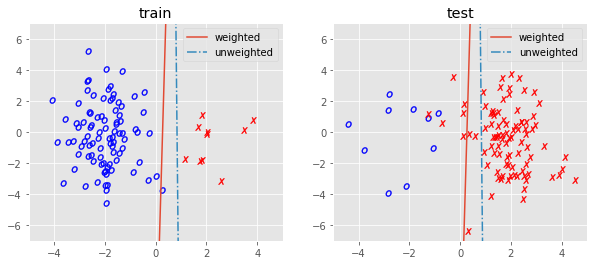

In [32]:
train_x, train_y = generate_data(n_total=100, n_positive=90)
eval_x, eval_y = generate_data(n_total=100, n_positive=10)
theta_weighted, theta_unweighted = train()
visualize(train_x, train_y, eval_x, eval_y, theta_weighted, theta_unweighted)